<a href="https://colab.research.google.com/github/JuanDaGue/GitHub/blob/master/Parcial_N%C2%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spiceypy

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import spiceypy as spy
from spiceypy import conics
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
#from meccel import *
#%matplotlib nbagg
##Tengo un problema con el mecel por eso tengo que importar cada libreria por aparte
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Examen De Meccel 
#Juan David Guerrero U  C.C :1059705736

##**3. Problema de 2 cuerpos .** 
Suponga que se tiene el Sol, con masa $M$, y un planeta, con masa $m$, orbitando al rededor del sol en una órbita circular de radio $r1$. Luego, considere que el planeta está rodeado por una “esfera de actividad” de radio $r_{Hill}=r1\left(\frac{m}{M}\right)^{2/5}$. Ahora, introduzca un tercer cuerpo con masa despreciable (ej. un cometa). Suponga que por fuera de la esfera de actividad este cuerpo se mueve en una órbita Kepleriana alrededor del Sol, pero dentro de la esfera se mueve en una órbita Kepleriana alrededor del planeta.
>**a)** Escriba un programa para calcular órbitas en este modelo.

>**b)** Busque casos donde el encuentro con el planeta resulte en un cambio significativo de la energía orbital del planeta.

>**c)** Interpretando el planeta como Júpiter, busque situaciones en las que un cometa con   orbita parabólica sea “capturado” por Júpiter, es decir, que se convierta en un cometa periódico con afelio cercano al radio de la órbita de Júpiter.

> **d)** Estudie cómo una nave espacial lanzada desde la Tierra, con afelio $r1$, puede recibir asistencia gravitacional para llegar, por ejemplo, a Saturno


In [ ]:
#Constantes del problema
G=6.67e-11
M=1.98e30  # (kg) masa del sol
m=1.898e27 # (kg)masa de jupyter
mc=2.2e14 # (kg) masa del cometa
r=a=778.5e9 # (m) distancia a Jípiter 
Mu=G*(M+m) # mu
T=12*365.25*86400 #periodo de Júpiter en segundos

e=0 #excentricidad 
# Esfera de Actividad
R=r*(m/M)**(2/5)


R/1.5e11

#Unidades Caónicas
UL=a
UM=M+m
UT=sqrt(UL**3/(G*UM))
UV=UL/UT
#Cantidades en unidades Canónicas
M=M/UM
m=m/UM
mc=mc/UM
r=a/UL

R=R/UL


#Problema de 2 cuerpos (Sol-Júpiter)

In [ ]:
##Estos comandos son para cargar meccel 
from google.colab import files
uploaded=files.upload()

Saving meccel.conf to meccel (3).conf
Saving meccel.py to meccel (3).py


In [ ]:
from meccel import *

In [ ]:
#Condiciones iniciales
T=10.0
Nt=1000.0
sistema=dict(
    particula1=dict(
        m=1.0,
        r=[0,0,0],
        v=[0,0,0]),
    particula2=dict(
        m=0.00095,
        r=[1,0,0],
        v=[0,1,0],
    ),
    particula3=dict(
        m=1.1100470357203045e-16,
        r=[1.12,0,0],
        v=[0,2/3,0],
    )
)
tini=0.0
tend=10
Nt=100
rs,vs,masas,N=solucionNbody(sistema,tini,tend,Nt)
rscm,vscm=in2cm(rs,vs,masas,Nt,N)


**Graficando un esquema del Problema:**

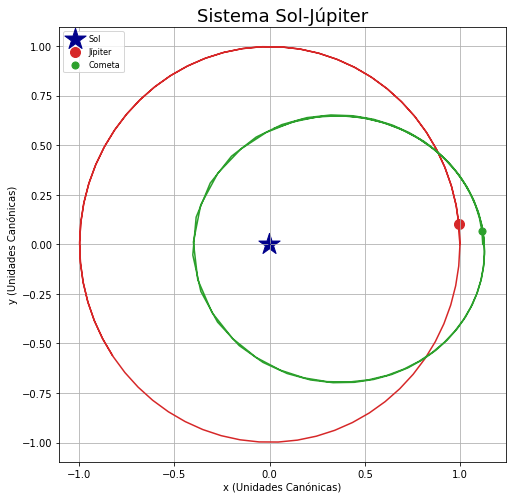

In [ ]:
plt.figure(figsize=(8,8))
#plt.plot(r*np.cos(f),r*np.sin(f))
plt.plot(rscm[0,:,0],rscm[0,:,1],color="darkblue")
plt.plot(rscm[1,:,0],rscm[1,:,1],color="tab:red")
plt.plot(rscm[2,:,0],rscm[2,:,1],color="tab:green")

plt.scatter(rscm[0,1,0],rscm[0,1,1],color="darkblue",marker="*",s=500,label="Sol")
plt.scatter(rscm[1,1,0],rscm[1,1,1],color="tab:red",marker="o",s=100,label="Jípiter")
plt.scatter(rscm[2,1,0],rscm[2,1,1],color="tab:green",marker="o",s=50,label="Cometa")

#ext=ext=np.abs(rscm[:,:,:2]).max()
plt.title("Sistema Sol-Júpiter",fontsize=18)
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
#plt.xlim(-r,r)
#plt.ylim(-r,r)
plt.grid()
plt.legend(loc="upper left",fontsize=8)


#Problema jerárquico
Considero el sistema $M_1$, $m_2$ y $m_3$ como un sistema de dos cuerpos, ya que se puede considerar una partícula de masa $M_{jeq}=M_1+m_2$ ubicada un el centro de masa del sistema $m_1,m_2$, la cual interactua con el cuerpo $m_3$

###Solución a)

In [ ]:
#Solución problema de los 2 cuerpos Jerarquico

e=0.6 #Excentricidad
a=1.7# Semieje mayor en unidades conónicas

#e=input("Ingrese el valor de la excentricidad")
#a=input("Ingrese el valor del semieje mayor")

def Radioconica(f,e,a):
  P=a*(1-e**2)
  return (P)/(1+e*cos(f))


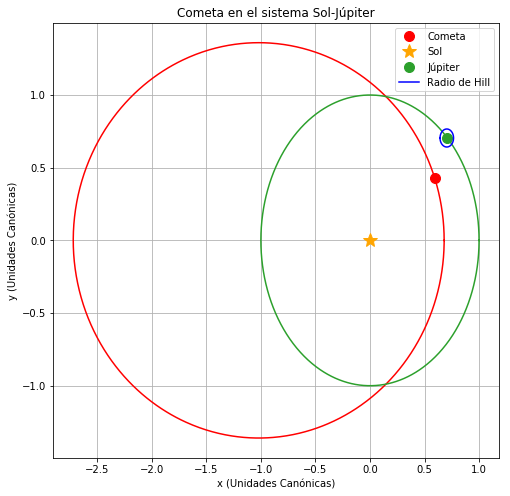

In [ ]:
f=np.linspace(0,2*np.pi,1000)

# Posición del cometa
X=Radioconica(f,e,a)*np.cos(f)
Y=Radioconica(f,e,a)*np.sin(f)

Col=['b','r','black','b','r','g','black','r']
###Gráfico
plt.figure(figsize=(8,8))



#plt.plot(xt[:,0],yt[:,0],zt[:,0], color=Col[3])
#plt.plot(xt[:,1],yt[:,1],zt[:,1], color=Col[1])

plt.plot(X,Y,Color=Col[4])
plt.plot(X[100],Y[100],"o",Color=Col[4],markersize=10,label="Cometa")

plt.plot(0,0,"*",color="orange",markersize=15,label=r"Sol")
#órbita de Jípiter
plt.plot(r*np.cos(f),r*np.sin(f),color="tab:green")
plt.plot(r*np.cos(np.pi/4),r*np.sin(np.pi/4),"o",color="tab:green",markersize=10,label="Júpiter")
plt.plot(r/1.42-R*np.cos(f),r/1.42-R*np.sin(f),color=Col[3],label="Radio de Hill")

plt.title("Cometa en el sistema Sol-Júpiter")
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
#plt.xlim(-r,r)
#plt.ylim(-r,r)
plt.grid()
plt.legend()

###Solución b)
La energia especifica de l sistema de dos cuerpos esta dada por la ecuación (1)
$$\epsilon=\dfrac{v^2}{2}-\dfrac{\mu}{r}\qquad (1)$$
Como la energía del cometa es constante en cualquier punto de la órbita, se calcula en el punto mas cercano al sol, el perihelio "$q$", el cual se da en la ecuación de la cónica, cuando $f=0$

$$r=\dfrac{P}{1+e\cos(f)}=\dfrac{P}{1+e}=\dfrac{a(1-e^2)}{1+e}$$
$$q=a(1-e)\qquad(2)$$
teniendo en cuenta que $h=rvsin(\theta_v)=qv$ en el perihelio, la ecuación (1) queda de la siguiene manera
$$
\epsilon=\dfrac{h^2}{2q^2}-\dfrac{\mu}{q}= \dfrac{h^2-2q\mu}{2q^2}=\dfrac{q\mu(1+e)-2q\mu}{2q^2}
$$
$$\epsilon=\dfrac{\mu(1+e-2)}{2a(1-e)}=-\dfrac{\mu}{2a}\qquad (3)$$

Por tanto si el cometa en su paso por el sistema Solar, es afectado gravitacionalmente por un planeta, cambiando su órbita, lo mas probable es que este adquiera una excentricidad, y un semieje mayor diferente, por tanto estos cuerpos cambian su energia específica, ya que esta depende de la distncia al Sol, ademas es necesario tener en cuenta que la energía para una orbita elíptica es positiva, ya que para una elipse el semieje mayor es negativo.
>**Caso 1** El $a$ resultante es menor que el $a$ que el objeto tenia inicialmente,  esto resulta en un aumento en la energía específica del cuerpo. De modo tal que si el objeto en pricipio tenia una orbita elíptica  con energia negativa, esta aunmete tanto que pueda hasta volverse positiva y resultar una orbita hiperbólica

>**Caso 2** El $a$ resultante es mayor que el $a$ que el objeto tenia inicialmente, esto quiere decir que el cuerpo pierde energía
y puede pasar de ser hiperbólica a elíptica

>**Caso 3** la energía específica resultante es cero, lo cual quiere decir que el cuerpo, tendria una trayectoria parabólica y el cuerpo saldria del sistema solar.

###Solución c)
Para que un cuerpo con elementos orbitales como $a$, $e=0$, sea capturado por Júpiter, se debe cumplir que el objeto pase lo suficientemente cerca de Júpiter para que este lo frene gracias a su gravedad y que la energía especifica de este despues del encuentro con Júpiter  sea negativa $\epsilon< 0$, ademas se debe cumplir que el afelio de este sea aproxiamdo al radio de la órbita de Júpiter $r_1\approx Q$.
Este afelio $Q$   esta determinado por $$Q=a(1+e)=r_1$$
donde $a$ es el nuevo semieje mayor de la órbita del cometa  y $e$ es la excentricidad.
la energia del cometa seria.
$$\epsilon=-\dfrac{\mu}{2a}=-\dfrac{\mu(1+e)}{2r_1}$$
Es posible encontrar ciertos valores de $e$ que puedan satisfacer esa ecuación como en la siguiente figura.



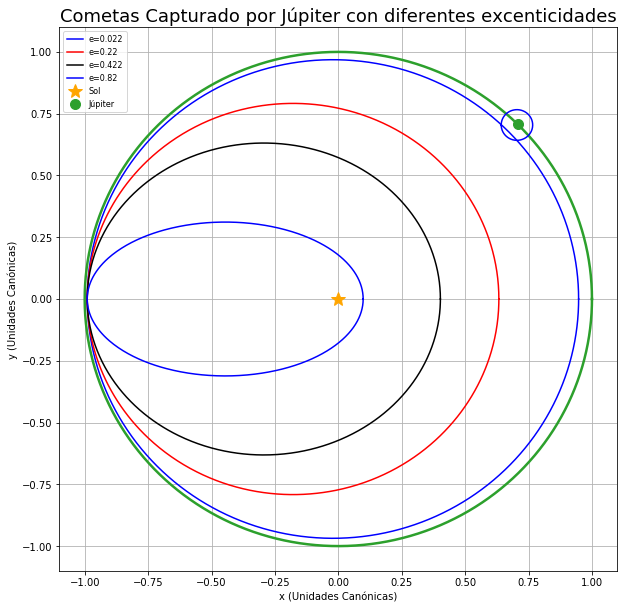

In [ ]:
e=np.array([0.022,0.22,0.422,0.82])

a=0.99/(1+e)



X=Radioconica(f,e[0],a[0])*np.cos(f)

Y=Radioconica(f,e[0],a[0])*np.sin(f)
Col=['b','r','black','b','r','g','black','r']
E=['e=0.022','e=0.22','e=0.422','e=0.82']
###Gráfic0
plt.figure(figsize=(10,10))

for i in range(len(e)):
  plt.plot(Radioconica(f,e[i],a[i])*np.cos(f),Radioconica(f,e[i],a[i])*np.sin(f),Color=Col[i],label=E[i])

#plt.plot(X[100],Y[100],"o",Color=Col[4],markersize=10,label="C e=0.022")
#plt.plot(Radioconica(f,e,a)*np.cos(f),Radioconica(f,e,a)*np.sin(f),Color=Col[4])
plt.plot(0,0,"*",color="orange",markersize=15,label=r"Sol")
#órbita de Jípiter
plt.plot(r*np.cos(f),r*np.sin(f),color="tab:green",linewidth=2.5)
plt.plot(r*np.cos(np.pi/4),r*np.sin(np.pi/4),"o",color="tab:green",markersize=10,label="Júpiter")
plt.plot(r/1.42-R*np.cos(f),r/1.42-R*np.sin(f),color=Col[3])

plt.title("Cometas Capturado por Júpiter con diferentes excenticidades",fontsize=18)
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
#plt.xlim(-r,r)
#plt.ylim(-r,r)
plt.grid()
plt.legend(loc="upper left",fontsize=8)

In [ ]:
G*(1.98e30)/(2*a[1]*UL)

104526653.8214515

En este gráfico se pueen observar diferentes objetos capturados por Júpiter, ya que este los frena cuando estos pasan cerca del radio de Hills, por ejemplo para un objeto cuya excentricidad es $e=0.22$ su semieje mayor seria de $a=0.81U_l\approx 4.22 UA$. esto objeto paso de tener una energia de $\epsilon=0$ a una energía específica de $-104526653.82 \,\mbox{J}/{kg}$

###Solución d)

si la nave tiene un afelio similar al de Jupiter por tanto esta tendra una orbita que se cruzara con la órbita de Júpiter en un momento dado, esta nave tendra una energía, propia de un cuerpo en órbita elíptica alrededor de Júpiter, al llegar al radio de hill, esta nave sera afectada por la gravedad de Júpiter dependiendo de esta interacción, la nave puede obtener una nueva órbita, mucho mas excentrica, e incluiso hiperbólica, dependiendo de la energia que Júpiter propicie al satelite, y así llegar hasta Saturno

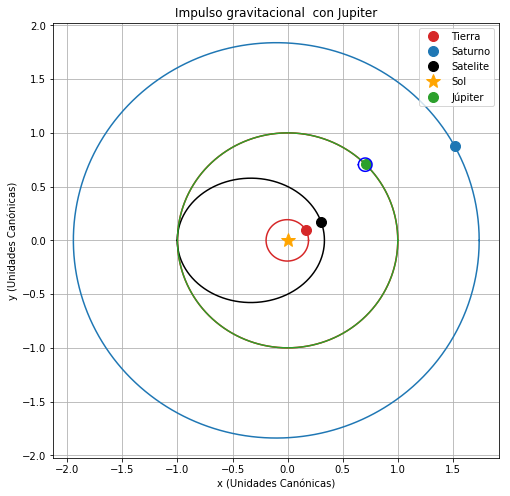

In [ ]:
#semiejemayor Saturno

rs=1.434e12#metros
asat=rs/UL
es=0.056
#Semiejemayor Tierra
rt=1.5e11
at=rt/UL
et=0.016
# SEmieje de la nave
en=0.5

an=1.002/(1+en)
f=np.linspace(0,2*np.pi,1000)
f2=np.linspace(np.pi,3*np.pi,1000)
# Posición del cometa
X=Radioconica(f,0,1)*np.cos(f)
Y=Radioconica(f,0,1)*np.sin(f)

Col=['b','r','black','b','r','g','black','r']
###Gráfico
plt.figure(figsize=(8,8))



#plt.plot(xt[:,0],yt[:,0],zt[:,0], color=Col[3])
#plt.plot(xt[:,1],yt[:,1],zt[:,1], color=Col[1])
plt.plot(Radioconica(f,et,at)*np.cos(f),Radioconica(f,et,at)*np.sin(f),Color="tab:red")
plt.plot(Radioconica(np.pi/6.0,et,at)*np.cos(np.pi/6.0),Radioconica(np.pi/6.0,et,at)*np.sin(np.pi/6.0),"o",color="tab:red",markersize=10,label="Tierra")
plt.plot(Radioconica(f,es,asat)*np.cos(f),Radioconica(f,es,asat)*np.sin(f),Color="tab:blue")
plt.plot(Radioconica(np.pi/6.0,es,asat)*np.cos(np.pi/6.0),Radioconica(np.pi/6.0,es,asat)*np.sin(np.pi/6.0),"o",color="tab:blue",markersize=10,label="Saturno")
plt.plot(X,Y,Color=Col[4])

#plot de la nave
plt.plot(Radioconica(f2,en,an)*np.cos(f2),Radioconica(f2,en,an)*np.sin(f2),Color="k")
plt.plot(Radioconica(np.pi/6.0,en,an)*np.cos(np.pi/6.0),Radioconica(np.pi/6.0,en,an)*np.sin(np.pi/6.0),"o",color="k",markersize=10,label="Satelite")
plt.plot(0,0,"*",color="orange",markersize=15,label=r"Sol")
#órbita de Jípiter
plt.plot(r*np.cos(f),r*np.sin(f),color="tab:green")
plt.plot(r*np.cos(np.pi/4),r*np.sin(np.pi/4),"o",color="tab:green",markersize=10,label="Júpiter")
plt.plot(r/1.42-R*np.cos(f),r/1.42-R*np.sin(f),color=Col[3])

plt.title("Impulso gravitacional  con Jupiter")
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
#plt.xlim(0,2.0)
#plt.ylim(-r,r)
plt.grid()
plt.legend()

Es posible que el cometa obtenga un impulso gravitacional dedo por Júpiter como se ve en la figura 



##4. Problema restringido de $3$ cuerpos . Resuelva los siguientes problemas:

**a)** Escriba un programa para encontrar el valor de la *constante de Jacobi* $C_j$ correspondiente
a los puntos de Lagrange $L_1, L_2$ y $L_3$ para un valor de $μ$ dado.





In [ ]:
#Constantes de movimiento
Mt=5.98e24
Ml=7.35e22
d=4.5e8
G=6.67e-11

#Unidades Canónicas
Um=Ml+Mt
Ul=d
Ut=sqrt(Ul**3/(G*Um))

#Parametros de la Constante de Jacobi
alpha=Ml/Um

#puntos de Lagrange
def lagrangePoints(x,alpha):
    x1=-alpha
    x2=1-alpha
    f=(1-alpha)*(x-x1)/abs(x-x1)**3+alpha*(x-x2)/abs(x-x2)**3-x
    return f
print("El sistema tierra luna tiene un valor de alpha : %.6f"%alpha)

El sistema tierra luna tiene un valor de alpha : 0.012142


In [ ]:
#Puntos de Lagrange
from scipy.optimize import bisect

L1x=bisect(lagrangePoints,0,1-alpha-alpha/10,args=(alpha,))
L2x=bisect(lagrangePoints,(1-alpha)+alpha/2,2,args=(alpha,))
L3x=bisect(lagrangePoints,-2,-alpha-alpha/2,args=(alpha,))

print("los puntos de lagrange son L1:","%.4f"%L1x,"L2:","%.4f"%L2x,"L3:","%.4f"%L3x)

los puntos de lagrange son L1: 0.8370 L2: 1.1556 L3: -1.0051


##**Graficando los puntos de Lagrnage**

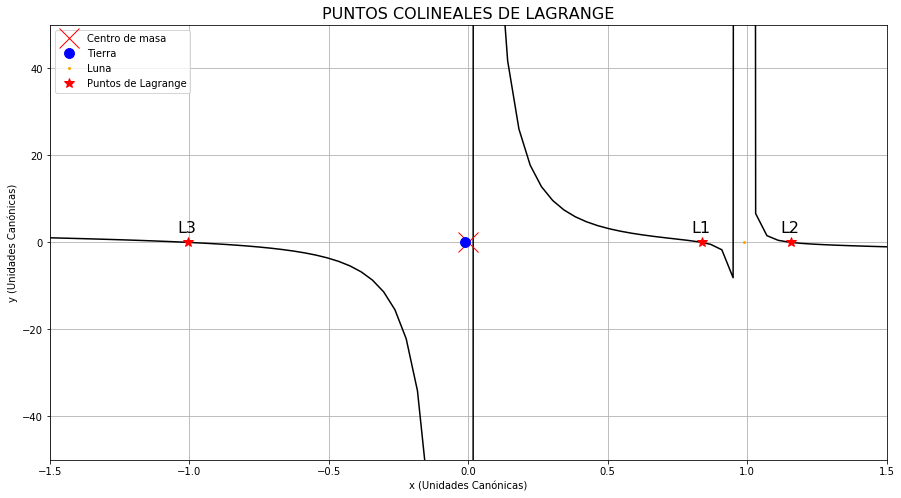

In [ ]:
xs=np.linspace(-2,2,100)
plt.figure(figsize=(15,8))
plt.plot(xs,lagrangePoints(xs,alpha),'k-')
plt.plot(0,0,"rx",markersize=20*(1-alpha),label="Centro de masa")
plt.plot(-alpha,[0],'o',color='blue',markersize=10*(1-alpha),label="Tierra")
plt.plot([1-alpha],[0],'o',color='orange',markersize=max(2,10*alpha),label="Luna")
#Graficando los puntos de Lagrange
plt.annotate(r'L1',
            xy=(L1x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
            #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([L1x],[0],'r*',markersize=10,label="Puntos de Lagrange")
plt.annotate(r'L2',
            xy=(L2x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L2x],[0],'r*',markersize=10)
plt.annotate(r'L3',
            xy=(L3x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L3x],[0],'r*',markersize=10)
plt.title("PUNTOS COLINEALES DE LAGRANGE",fontsize=16)
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
plt.xlim(-1.5,1.5)
plt.ylim(-50,50)
plt.grid()
plt.legend()

Usando la expresión de la constante de Jacobi es posible calcular su valor, teniendo en cuenta que en los puntos colineales de Lagrange $z$ y $y$ son cero, ya que $L1$, $L2$ y $L3$, estan sobre el eje x, Tomando $x$ correspondiente a un punto de Lagrange se tiene 

In [ ]:
#fUNCION QUE CALCULA EL VALOR DE LA CONSTANTE DE JACOBI PARA L1,L2,L3
def JacobiConstant(L,v,alpha):
    r1=-alpha
    r2=1-alpha
    omega=1
    R1=abs(L-r1)
    R2=abs(L-r2)
    C=2*(1-alpha)/(R1)+2*alpha/(R2)+(L**2)-(v)**2
    return C
#Valores de la constante de Jacobi
Cj1=JacobiConstant(L1x,0,alpha)# constante de Jacobi para L1
Cj2=JacobiConstant(L2x,0,alpha)# constante de Jacobi para L2
Cj3=JacobiConstant(L3x,0,alpha) # constante de Jacobi para L3
print("los puntos de Lagrange son L1 & L2 L3, Tienen como constante de Jacbi a","%.4f"%Cj1,"%.4f"%Cj2,"%.4f"% Cj3)

los puntos de Lagrange son L1 & L2 L3, Tienen como constante de Jacbi a 3.1883 3.1721 3.0121


**b)** Considere el sistema Tierra-Luna y construya un programa para calcular la órbita de una nave espacial (lanzada desde algún punto sobre la superficie de la Tierra) dentro de este sistema. Estudie las condiciones iniciales para que el cuerpo quede orbitando alrededor de la Luna, alrededor de la Tierra y alrededor de ambos cuerpos.

**Solución**
Para resolver este problema, es necesario examinar el siguiente gráfico del (CRTBP) donde se muestran curvas de cero velocidad, para diferentes valores de la Constante de Jacobi
<a href="https://ibb.co/7kMmtr8"><img src="https://i.ibb.co/sWxY9sk/Captura.png" alt="Captura" border="0"></a>

Estas curvas se pueden interpretar como las regiones donde se puede mover el cuerpo $m_3$, se puede observar que en la curva azul, esta delimitando la region entre los dos cuerpos $m_1$ y $m_2$, en cuya intersección se encunetra el punto de Lagrnge $L_1$,al cual corresponde a un valor de la cosntante de Jacobi. 

$$
C_J=-\vec{v}^{2}+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+x^{2}+y^{2}\qquad(1).
$$

En este caso  que si desea que la partícula $m_3$ orbite unicamente la tierra, se debe hallar una velocidad $v_0$ de tal modo que la Constante de Jacobi este definiendo la region azul, si se quiere que la particula pase a la region roja, se debe incrementar la velocidad, y esta eventualmente pasara a órbitar la Luna.
Para encontrar el $C_j$ correspondiente a la curva Azul, Es necesario ubicarnos en el punto de Lagrange $L_1$, ya que si la nave llega a este punto, esta estaria en reposo (Desde el sistema rotatante), solo seria necesario incrementar la velocidad para que esta pase a la region roja. 
esto se puede lograr de la siguente manera
$$
C_J=\frac{2\left(1-\alpha\right)}{x_{L_{1}}+\alpha}+\frac{2\alpha}{1-\alpha-x_{L_{1}}}+x_{L_{1}}^{2}=3.18832\qquad(2).
$$
Teniendo este valor de $C_j$ despejamos la Velocidad dela ecuacion (1) y tenemos la velocidad min que necesita una particula para llegar a $L_1$
$$
\boxed{v_{min}=\sqrt{-C_{J}+\frac{2\left(1-\alpha\right)}{a}+2\alpha+x^{2}+y^{2}}.\qquad(3)}
$$


In [ ]:
#Constane de Jacobi asociada a L1

Cj=JacobiConstant(L1x,0,alpha)
"""
Calculo de la velocidad Minima para que la partícula se mueva  unicamente en la region azul
""" 
def Velocidadminima(x,y,Cj):
  return np.sqrt(-Cj+2*(1-alpha)/a+x**2+y**2+2*alpha)

x=6400e3/Ul -alpha #Posicón de lanzamiento de la nave sobre la superficie de la tierra
y=0
a=6400e3/Ul

V_min=Velocidadminima(x,y,Cj) #velocidad minima 
v= Velocidadminima(x,y,Cj)*(Ul/Ut)/1000 #velocidad 




print("La constante de Jacobi para  L1 =%.4f  "%L1x," es =%.4f m/s"%Cj)
print("La velocidad minima es para mantenerce en la región azul es  %.4f Ul/Ut "%V_min,"%.4f m/s"%v)
print("La posición de lanzamiento de la partícula es  %.4f Ul "%x)


La constante de Jacobi para  L1 =0.8370    es =3.1883 m/s
La velocidad minima es para mantenerce en la región azul es  11.6513 Ul/Ut  11.0366 m/s
La posición de lanzamiento de la partícula es  0.0021 Ul 


La constante de Jacobi para para $L_1$ es $3.1882$, por tanto una particula para llegar a $L_1$ Necesita una velocidad minima de $11.037\mbox{m}/\mbox{s}^2$

In [ ]:
#Ecuacion diferencial CRTBP
def EoM_CRTBP(y,t,alpha):
    r1=np.array([-alpha,0,0])
    r2=np.array([1-alpha,0,0])
    omega=np.array([0,0,1])

    r=y[:3]
    v=y[3:]

    R1=r-r1
    R2=r-r2

    drdt=v
    dvdt=-(1-alpha)/np.linalg.norm(R1)**3*R1-alpha/np.linalg.norm(R2)**3*R2-np.cross(omega,np.cross(omega,r))-2*np.cross(omega,v)

    dydt=drdt.tolist()+dvdt.tolist()

    return dydt

#Objeto orbitando unicamente la Tierra
Para que la partícula órbite  unicamente la tierra es necesario una velocidad menor a $v_{min}=11.2\, U_l/U_t=11.65\, \mbox{km}/\mbox{s}$ y mayor a $v_{esc}=11,186\, \mbox{km}/\mbox{s}$ que es la velocidad de escape de la tierra.


#Objeto orbitando unicamente la Tierra
Para que la partícula órbite  unicamente la tierra es necesario una velocidad menor a $v_{min}=11.2\, U_l/U_t=11.65\, \mbox{km}/\mbox{s}$ y mayor a $v_{esc}=11,186\, \mbox{km}/\mbox{s}$ que es la velocidad de escape de la tierra.


In [ ]:
alpha=0.012141
#Condiciones Iniciales
ro=[0.0020,0,0] ##Cuerpo Ubicado sobre la Superficie de la tierra
vo=[8.54,7.950,0.0]
#ro=[0.5,0,0]
#vo=[0,1,0]

# Solución
Nt=100
T=20.0
ts=np.linspace(0,T,10000)
y=ro+vo
solution=odeint(EoM_CRTBP,y,ts,args=(alpha,))
rs=solution[:,:3]
vs=solution[:,3:]
v=np.linalg.norm(vo)
print("Modulo de la velocidad: %4.f"%v)

Modulo de la velocidad:   12


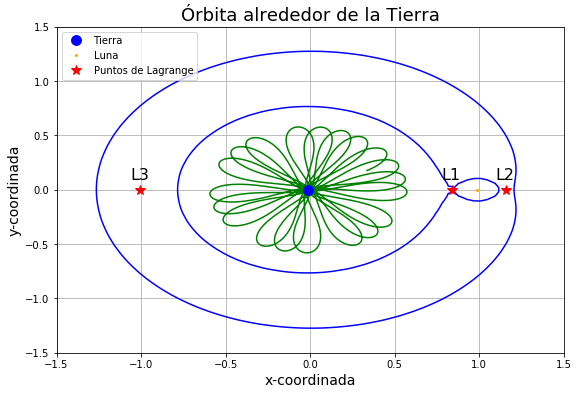

In [ ]:
xmax=-1.5
ymax=1.5
NG=80
X,Y=np.meshgrid(np.linspace(-xmax,xmax,NG),np.linspace(-ymax,ymax,NG))

#Gráfico de la órbita
fig=plt.figure(figsize=(20,6))
axr=fig.add_subplot(1,2,1)
#Curva de Cero Velocidad
V2=2*(1-alpha)/np.sqrt((X+alpha)**2+Y**2)+2*alpha/np.sqrt((X-1+alpha)**2+Y**2)+X**2+Y**2-Cj1
c=axr.contour(X,Y,V2,levels=[0],colors="b")

# Rotante
axr.plot(rs[:,0],rs[:,1],color='green')
#axr.plot([-alpha],[0],'o',color='blue',markersize=10*(1-alpha))
#axr.plot([1-alpha],[0],'o',color='orange',markersize=10*alpha)
axr.plot(-alpha,[0],'o',color='blue',markersize=10*(1-alpha),label="Tierra")
axr.plot([1-alpha],[0],'o',color='orange',markersize=max(2,10*alpha),label="Luna")
#Add a few more bells and whistles
axr.set_xlabel("x-coordinada",fontsize=14)
axr.set_ylabel("y-coordinada",fontsize=14)
#ax.set_zlabel("z-coordinate",fontsize=14)
axr.set_title("Órbita alrededor de la Tierra",fontsize=18)
plt.annotate(r'L1',
            xy=(L1x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
            #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([L1x],[0],'r*',markersize=10,label="Puntos de Lagrange")
plt.annotate(r'L2',
            xy=(L2x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L2x],[0],'r*',markersize=10)
plt.annotate(r'L3',
            xy=(L3x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L3x],[0],'r*',markersize=10)

# Decoration

ext=rs.max()
axr.set_xlim((-1.5,1.5))
axr.set_ylim((-1.5,1.5))
axr.grid()
axr.legend(loc="upper left",fontsize=10)

La partícula esta limitada por la region azul, por tanto el satélite unicamente orbitara la Tierra.

#Objeto orbitando el sistema Tierra-Luna
Para que orbite ambos cuerpos es necesario dotar al el zatélite de un velocidad mayor a $11,65\, Km/s^2$ aunque no demasiada porque no se desea que alcanse una velocidad que la pueda sacar de la region roja.

In [ ]:
alpha=0.01214
#Condiciones Iniciales
ro=[0.00208,0,0]
vo=[0.034,11.66110,0.0]
#ro=[0.5,0,0]
#vo=[0.053071,11.6804355,0] #velocidad para que el Tercer cuerpo orbite M1 y m2

# Solución
Nt=1000
T=100.0
ts=np.linspace(0,T,1000)
y=ro+vo
solution=odeint(EoM_CRTBP,y,ts,args=(alpha,))
rs1=solution[:,:3]
vs1=solution[:,3:]
np.linalg.norm(vo)

11.661149566402104

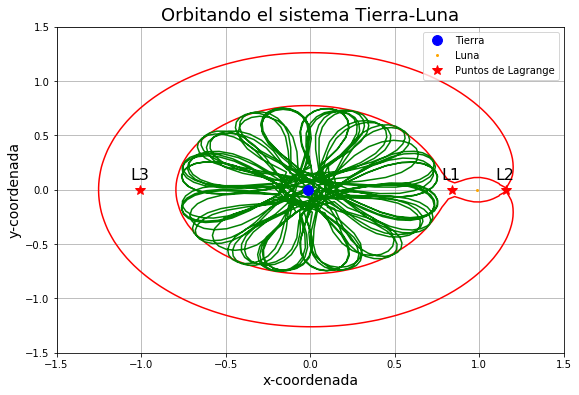

In [ ]:
#Gráfico de la órbita
xmax=-1.5
ymax=1.5
NG=80
X,Y=np.meshgrid(np.linspace(-xmax,xmax,NG),np.linspace(-ymax,ymax,NG))
fig=plt.figure(figsize=(20,6))
axr=fig.add_subplot(1,2,1)
#Curva de Cero Velocidad
V2=2*(1-alpha)/np.sqrt((X+alpha)**2+Y**2)+2*alpha/np.sqrt((X-1+alpha)**2+Y**2)+X**2+Y**2-Cj2
c=axr.contour(X,Y,V2,levels=[0],colors="r")
# Rotante
axr.plot(rs1[:,0],rs1[:,1],color='green')
#axr.plot([-alpha],[0],'o',color='blue',markersize=10*(1-alpha))
#axr.plot([1-alpha],[0],'o',color='orange',markersize=10*alpha)
axr.plot(-alpha,[0],'o',color='blue',markersize=10*(1-alpha),label="Tierra")
axr.plot([1-alpha],[0],'o',color='orange',markersize=max(2,10*alpha),label="Luna")
#Graficando los puntos de Lagrange
plt.annotate(r'L1',
            xy=(L1x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
            #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([L1x],[0],'r*',markersize=10,label="Puntos de Lagrange")
plt.annotate(r'L2',
            xy=(L2x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L2x],[0],'r*',markersize=10)
plt.annotate(r'L3',
            xy=(L3x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L3x],[0],'r*',markersize=10)
#Ejes
axr.set_xlabel("x-coordenada",fontsize=14)
axr.set_ylabel("y-coordenada",fontsize=14)
#ax.set_zlabel("z-coordinate",fontsize=14)
axr.set_title("Orbitando el sistema Tierra-Luna",fontsize=18)
# Decoration
ext=rs1.max()
axr.set_xlim((-1.5,1.5))
axr.set_ylim((-1.5,1.5))
axr.grid()
axr.legend()

El satélite en algun momento alcanzara a orbitar la Luna, ya que tanto la luna como la tierra estan dentro de la región de inclusión, el problema es que hay que esperar un tiempo indeterminado para que esto ocurra.

Para mostrar como la partícula no escapa de la región roja se muestra el siguiente ejemplo donde se toma un sistema con un $\alpha=0.2$, para que el tamaño de la region roja se mas grande y se pueda apreciar mejor este efecto 

In [ ]:
V_min=11.651334543728387
v= 11.03660770156871
x= 0.002080486036544517
alpha= 0.012141736185677706
Cj= 3.188259499804194
V_rmin=11.658890077668671
V_r=11.043764603961467


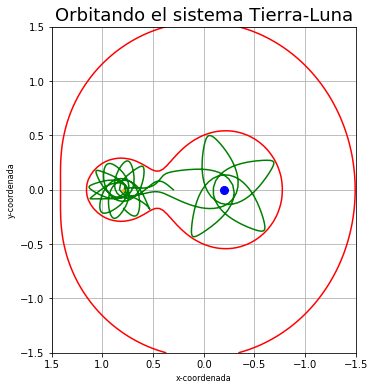

In [ ]:
alpha2=0.2
Cj2=JacobiConstant(L2x,0,alpha2)

ro=[0.3,0,0]
vo=[0.5,0.401,0.0]

# Solución
Nt=1000
T=20.0
ts=np.linspace(0,T,1000)
y=ro+vo
solution=odeint(EoM_CRTBP,y,ts,args=(alpha2,))
rs2=solution[:,:3]
vs2=solution[:,3:]

##
xmax=-1.5
ymax=1.5
NG=80
X,Y=np.meshgrid(np.linspace(-xmax,xmax,NG),np.linspace(-ymax,ymax,NG))

#Gráfico de la órbita
fig=plt.figure(figsize=(12,6))
axr=fig.add_subplot(1,2,1)

#Ejes
axr.set_xlabel("x-coordenada",fontsize=8)
axr.set_ylabel("y-coordenada",fontsize=8)
#ax.set_zlabel("z-coordinate",fontsize=14)
axr.set_title("Orbitando el sistema Tierra-Luna",fontsize=18)
#
#Curva de Cero Velocidad
V2=2*(1-alpha2)/np.sqrt((X+alpha2)**2+Y**2)+2*alpha2/np.sqrt((X-1+alpha2)**2+Y**2)+X**2+Y**2-Cj2
c=axr.contour(X,Y,V2,levels=[0],colors="r")
# Rotante
axr.plot(rs2[:,0],rs2[:,1],color='green')
axr.plot([-alpha2],[0],'o',color='blue',markersize=10*(1-alpha2))
axr.plot([1-alpha2],[0],'o',color='orange',markersize=10*alpha2)

# Decoration
ext=rs.max()
axr.set_xlim((-xmax,xmax))
axr.set_ylim((-ymax,ymax))
axr.grid()

Si se desea que el satelite se quede orbitando la luna, es necesario que la partícula este en la región cercana a la Luna, y una vez ahí bajar la velocidad de modo que el movimiento de la partícula vuelva a estar delimitada por la curva azul

In [ ]:
alpha=0.01214
#Condiciones Iniciales
x=1-alpha + (1.8e6+10)/UL
ro=[0.987,0,0] #posición para que el Tercer cuerpo orbite M1 y m2
vo=[0.0,(11.665345-6.37998975),0.0] #velocidad para que el Tercer cuerpo orbite M1 y m2

# Solución
Nt=1000
T=20.0
ts=np.linspace(0,T,1000)
y=ro+vo
solution=odeint(EoM_CRTBP,y,ts,args=(alpha,))
rs3=solution[:,:3]
vs3=solution[:,3:]
x

0.9878623121515735

5.28535525

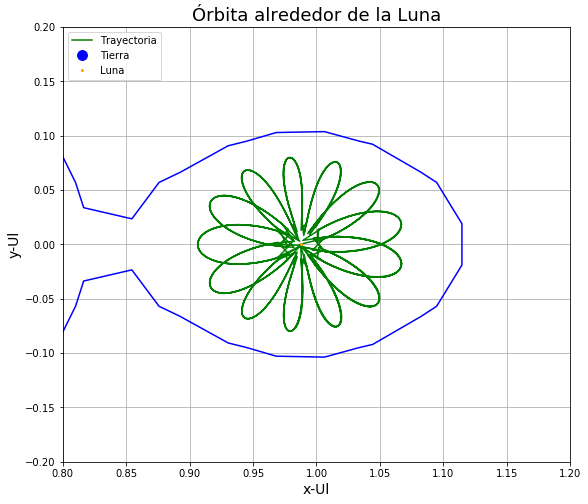

In [ ]:
xmax=-1.5
ymax=1.5
NG=80
X,Y=np.meshgrid(np.linspace(-xmax,xmax,NG),np.linspace(-ymax,ymax,NG))

#Gráfico de la órbita
fig=plt.figure(figsize=(20,8))
axr=fig.add_subplot(1,2,1)
#Curva de Cero Velocidad
V2=2*(1-alpha)/np.sqrt((X+alpha)**2+Y**2)+2*alpha/np.sqrt((X-1+alpha)**2+Y**2)+X**2+Y**2-Cj1
c=axr.contour(X,Y,V2,levels=[0],colors="b")

# Rotante
axr.plot(rs3[:,0],rs3[:,1],color='green',label="Trayectoria")
#
axr.plot(-alpha,[0],'o',color='blue',markersize=10*(1-alpha),label="Tierra")
axr.plot([1-alpha],[0],'o',color='orange',markersize=max(2,10*alpha),label="Luna")
#Add a few more bells and whistles
axr.set_xlabel("x-Ul",fontsize=14)
axr.set_ylabel("y-Ul",fontsize=14)
#ax.set_zlabel("z-coordinate",fontsize=14)
axr.set_title("Órbita alrededor de la Luna",fontsize=18)

# Decoration

ext=rs.max()
axr.set_xlim((0.8,1.2))
axr.set_ylim((-0.2,0.2))
axr.grid()
axr.legend(loc="upper left",fontsize=10)
np.linalg.norm(vo)